In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests

sns.set_palette(sns.color_palette("bright"))
sns.set_style("dark")

sns.set_context("talk")

In [6]:
def load_dataset(tipo):
    url_confirmed=f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-{tipo}.csv"
    s=requests.get(url_confirmed).content
    df=pd.read_csv(io.StringIO(s.decode('utf-8')))
    df = df.drop(["Province/State", "Lat", "Long"], axis=1)
    df = pd.DataFrame(df.set_index("Country/Region").stack()).reset_index()
    df = df.rename(columns={"Country/Region":"Country","level_1":"Date", 0:tipo})
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.groupby(["Date", "Country"])[tipo].max().reset_index()
    return df

In [7]:
df_confirmed = load_dataset("Confirmed")
df_recovered = load_dataset("Recovered")
df_deaths = load_dataset("Deaths")

In [8]:
new_df = pd.merge(df_confirmed, df_recovered,  how='left', left_on=["Date", "Country"], right_on = ["Date", "Country"])
new_df = pd.merge(new_df, df_deaths,  how='left', left_on=["Date", "Country"], right_on = ["Date", "Country"])
new_df = new_df[new_df["Confirmed"] > 0]
new_df['start_date'] = new_df.groupby('Country')['Date'].transform('min')
new_df["days_since_start"] = (new_df["Date"] - new_df['start_date']).dt.days

In [9]:
importantes = ["Colombia", "Italy", "Spain", "France", "US", "Germany", "South Korea"]

In [10]:
df_deaths.columns[2]

'Deaths'

In [11]:
df_prin = new_df[new_df["Country"].isin(importantes)]

# Confirmados

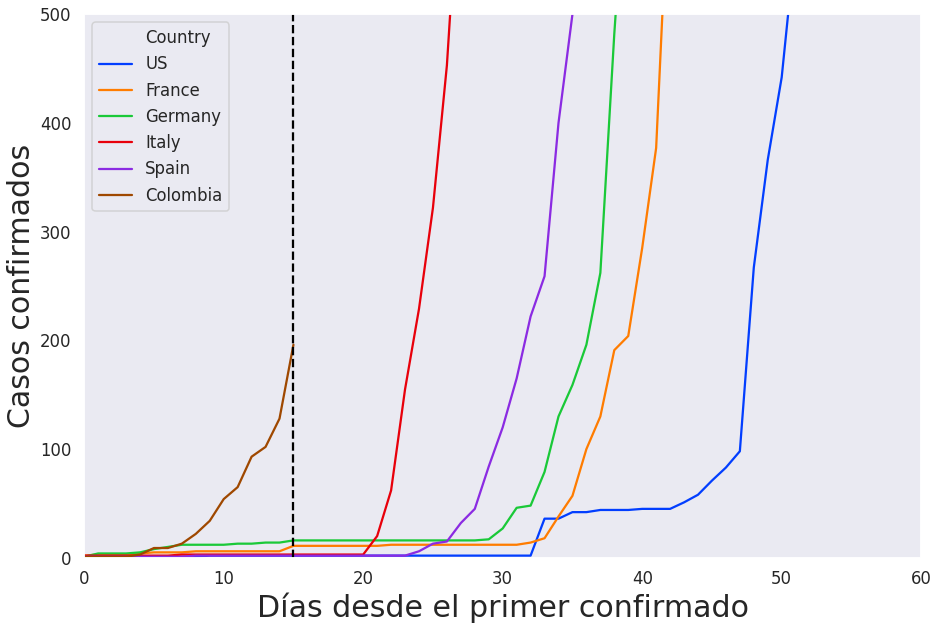

In [12]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x="days_since_start", y="Confirmed", hue="Country", data=df_prin)
ax.set_xlabel("Días desde el primer confirmado",fontsize=30)
ax.set_ylabel("Casos confirmados",fontsize=30)
dia_colombia = df_prin[df_prin["Country"] == "Colombia"]["days_since_start"].max()
plt.axvline(dia_colombia, 0,1400, color="k", linestyle='--')
axes = ax.axes
axes.set_ylim(0,500)
axes.set_xlim(0,60)
plt.show()

# Recuperados

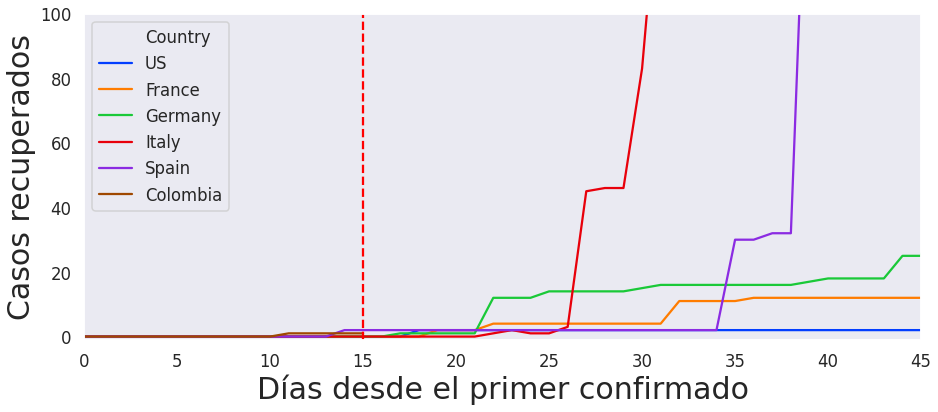

In [13]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x="days_since_start", y="Recovered", hue="Country", data=df_prin)
dia_colombia = df_prin[df_prin["Country"] == "Colombia"]["days_since_start"].max()
plt.axvline(dia_colombia, 0,1400, color="r", linestyle='--')
ax.set_xlabel("Días desde el primer confirmado",fontsize=30)
ax.set_ylabel("Casos recuperados",fontsize=30)
axes = ax.axes
axes.set_ylim(-1,100)
axes.set_xlim(0,45)
plt.show()

# Muertos

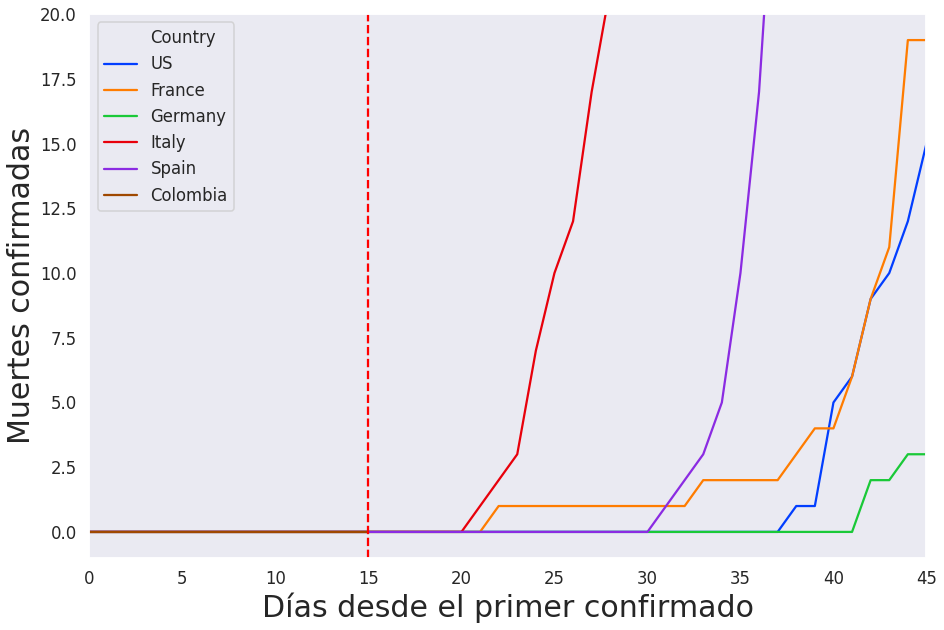

In [14]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x="days_since_start", y="Deaths", hue="Country", data=df_prin)
dia_colombia = df_prin[df_prin["Country"] == "Colombia"]["days_since_start"].max()
plt.axvline(dia_colombia, 0,1400, color="r", linestyle='--')
ax.set_xlabel("Días desde el primer confirmado",fontsize=30)
ax.set_ylabel("Muertes confirmadas",fontsize=30)
axes = ax.axes
axes.set_ylim(-1,20)
axes.set_xlim(0,45)
plt.show()

## Compare quarantine start

In [60]:
paises_comp = ["Italy", "Spain", "Colombia", "Russia"]
df_compare = new_df[new_df["Country"].isin(paises_comp)]

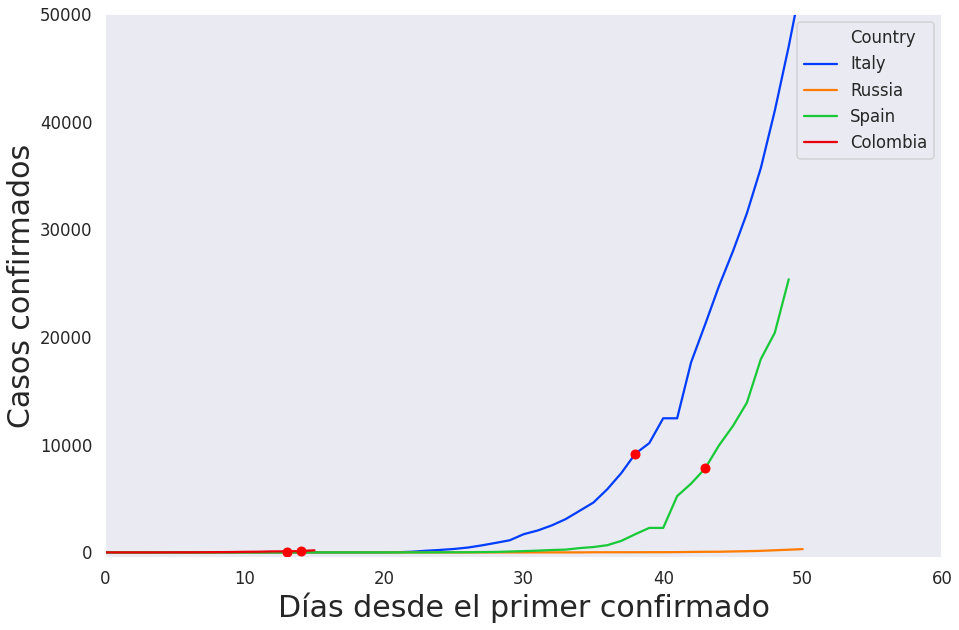

In [61]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x="days_since_start", y="Confirmed", hue="Country", data=df_compare)
ax.set_xlabel("Días desde el primer confirmado",fontsize=30)
ax.set_ylabel("Casos confirmados",fontsize=30)
cuarentenas = [38, 43, 14, 13]

for i, c in enumerate(cuarentenas):
    conf = df_compare[((df_compare["Country"] == paises_comp[i]) & (df_compare["days_since_start"] == c))]["Confirmed"].values[0]
    plt.plot(c, conf, marker='o', color="r")
    
axes = ax.axes
axes.set_ylim(-500,50000)
axes.set_xlim(0,60)
plt.show()